# TODO!!!

This demo is supposed ???. 

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on signals and systems hold at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets

plt.style.use('noelle.mplstyle')

**???**

A [discrete time](https://en.wikipedia.org/wiki/Discrete_time_and_continuous_time) [linear filter](https://en.wikipedia.org/wiki/Linear_filter) can be classified based on its [impulse response](https://en.wikipedia.org/wiki/Impulse_response). In case that the output of the filter is only dependent on the current and previous samples of the input singal (as shown below), the impulse response is of finite duration. Hence, this kind of filters is called [finite impulse response (FIR)](https://en.wikipedia.org/wiki/Finite_impulse_response) filters.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/FIR_Filter.svg" width="400">

If, on the other hand, the output of the filter only depends on previous samples of the filtered output, the filter is recursive (see block diagramm below) and its impulse response is of infinite length. For this reason this kind of filters are called [infinite impulse response (IIR)](https://en.wikipedia.org/wiki/Infinite_impulse_response) filter.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/IIRFilter2.svg" width="400">

In general, digital filters consist of both, a feedforward and a feedback (a recursive) path as depicted below. 

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d5/IIR-filter.png" width="400">

In this example a noisy ([additive white gaussian noise (AWGN)](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise)) cosine singal is fed into a digital filter and the effect of the filter on this signal, together with the filters impulse is visualized. The selectable filter types are

* a [moving average filter](https://en.wikipedia.org/wiki/Finite_impulse_response#Moving_average_example) with variable number of filter taps (FIR filter) and
* a [first order recursive filter](https://en.wikipedia.org/wiki/Infinite_impulse_response#Example) with variable amplitude of the feedback coefficient (IIR filter).






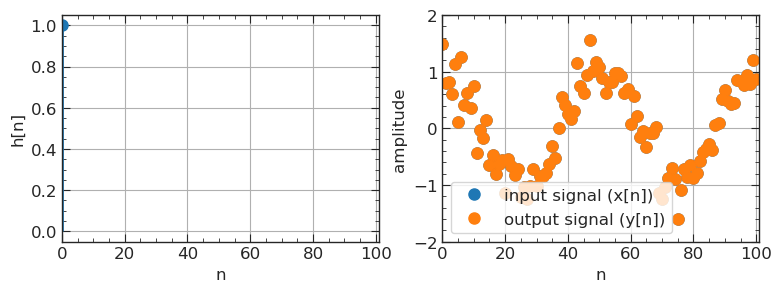

Output(layout=Layout(height='500px'))

In [2]:
def plot_discrete_system(type='FIR', N=1, alpha=0.01):
    
    # generate noisy cosine signal
    n = np.arange(0, 101, 1)
    x = np.cos(2 * np.pi * 0.02 * n)
    np.random.seed(1)
    x = x + 0.3 * np.random.standard_normal(x.shape)
    X = np.fft.fft(x)
    XNorm = X / np.max(np.abs(X))

    Omega = np.linspace(-np.pi, np.pi, n.size)
    
    # genaerate impulse response
    if type == 'FIR':
        # running mean filter or...
        h = np.ones(N)/N
    else:
        # ... first order recursive system
        h = alpha**n
        h = h / np.sum(np.abs(h))

    # convolution CHECK!!
    y = signal.convolve(x, h, mode='full')
    
    # ploting stuff    
    n_row = 1
    n_col = 2
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig = plt.figure(figsize=fig_size)

    ax = fig.add_subplot(n_row, n_col, 1)
    ax.stem(h, linefmt='C0-', markerfmt='C0o', use_line_collection=True)
    ax.set(xlabel='n', ylabel='h[n]', xlim=(0, n.size))

    ax = fig.add_subplot(n_row, n_col, 2)
    ax.plot(n, x, 'C0o')
    ax.plot(y, 'C1o')
    ax.set(xlabel='n', ylabel='amplitude', xlim=(0, n.size),  ylim=(-2, 2))
    ax.legend(['input signal (x[n])','output signal (y[n])'], loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
style = {'description_width': '40%'}
w_type = widgets.RadioButtons(options=['FIR', 'IIR'], value='FIR', description='filter type:', disabled=False)
#w_type = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1.0, continuous_update=False, description=r'width $\left(T_0\right)$:', style=style)
w_N = widgets.IntSlider(min=1, max=50, step=1, value=1, continuous_update=False, description=r'FIR filter order:', style=style)
w_alpha = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.01, continuous_update=False, description=r'IIR filter coefficient:', style=style)

ui = widgets.HBox([w_type, w_N, w_alpha])

out = widgets.interactive_output(plot_discrete_system, {'type':w_type, 'N':w_N, 'alpha':w_alpha})
out.layout.height = '500px'

display(ui, out)